In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

figsize = (12, 6)

def summarise_datasets(all_data, names):
    means = []
    stds = []
    indexes = []

    for name in names:
        means.append(all_data[name].mean())
        stds.append(all_data[name].std())
        indexes.append(name)

    df_mean = pd.DataFrame(means, index = indexes)
    df_std = pd.DataFrame(stds, index = indexes)

    return df_mean, df_std

def do_ttest(all_data, label1, label2):
    """ Wrapper around scipy ttest_ind, using Welch's t-test"""
    label1_data = all_data[label1]
    label2_data = all_data[label2]

    cat1 = label1_data["Reproj."]
    cat2 = label2_data["Reproj."]
    reproj = ttest_ind(cat1, cat2, equal_var=False)
          
    cat1 = label1_data["Recon."]
    cat2 = label2_data["Recon."]
    recon = ttest_ind(cat1, cat2, equal_var=False)
    
    cat1 = label1_data["Tracked Reproj."]
    cat2 = label2_data["Tracked Reproj."]
    tracked_reproj = ttest_ind(cat1, cat2, equal_var=False)
    
    cat1 = label1_data["Tracked Recon."]
    cat2 = label2_data["Tracked Recon."]
    tracked_recon = ttest_ind(cat1, cat2, equal_var=False)
    
    print(f"Reprojection p-value: {reproj.pvalue}")
    print(f"Reconstruction p-value: {recon.pvalue}")
    print(f"Tracked Reprojection p-value: {tracked_reproj.pvalue}")
    print(f"Tracked Reconstruction p-value: {tracked_recon.pvalue}")

    return reproj, recon, tracked_reproj, tracked_recon

# Load in calibration results from .csv files

In [2]:
calib_data = {}

path = './wsl_results'
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]

for csv in csv_files:
    file = os.path.join(path, csv)
    data_name = csv.split('.')[0]
    calib_data[data_name] = pd.read_csv(file, index_col = 0)

# Summary statistics for rig & freehand calibration

Mean Values


,Reproj.,Recon.,Tracked Reproj.,Tracked Recon.,Mean Frame Grab Time,Mean Calibration Time
charuco_rig,0.357172,2.164376,0.986046,2.226407,1.567297,9.613098
dots_rig,1.233714,1.469214,1.537654,1.468219,2.184797,38.240823
charuco_freehand,1.344054,2.232580,4.198533,3.359789,1.223518,20.758543


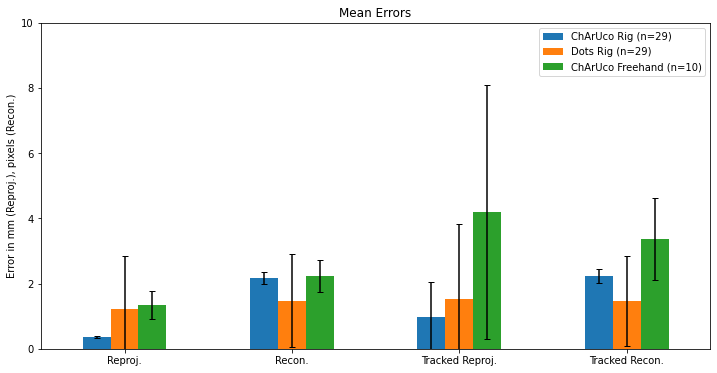

In [3]:
means, stds = summarise_datasets(calib_data, ["charuco_rig", "dots_rig", "charuco_freehand"])
columns_to_plot = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

labels = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

fig1 = plt.figure(figsize=(figsize))
ax1 = fig1.add_subplot(1, 1, 1)

means[columns_to_plot].transpose().plot.bar(title="Mean Errors", ax=ax1, yerr=stds.transpose(), ecolor='black', capsize=3, rot=0, legend=None, ylabel="Error in mm (Reproj.), pixels (Recon.)")
ax1.set_ylim(0, 10)

n_charuco_rig = len(calib_data["charuco_rig"])
n_dots_rig = len(calib_data["dots_rig"])
n_charuco_freehand = len(calib_data["charuco_freehand"])

L = ax1.legend()
legend = [f"ChArUco Rig (n={n_charuco_rig})", f"Dots Rig (n={n_dots_rig})", f"ChArUco Freehand (n={n_charuco_freehand})"]
L.get_texts()[0].set_text(legend[0])
L.get_texts()[1].set_text(legend[1])
L.get_texts()[2].set_text(legend[2])

plt.savefig('plots/charuco_vs_dots_vs_freehand_mean.png', dpi=600)

print("Mean Values")
means


# Freehand vs Rig (ChArUco)

Reprojection p-value: 4.049741735402587e-05
Reconstruction p-value: 0.682231199497307
Tracked Reprojection p-value: 0.02866879993541749
Tracked Reconstruction p-value: 0.0190194929870831


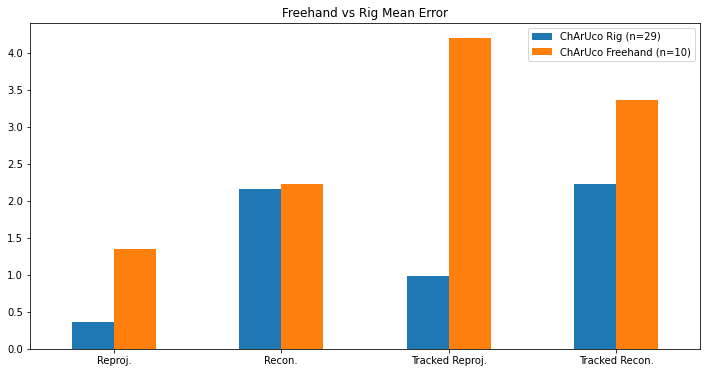

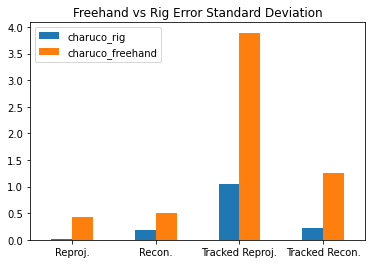

In [4]:
freehand_vs_rig_mean, freehand_vs_rig_std = summarise_datasets(calib_data, ["charuco_rig", "charuco_freehand"])
columns_to_plot = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

fig1 = plt.figure(figsize=(figsize))
ax1 = fig1.add_subplot(1, 1, 1)

freehand_vs_rig_mean[columns_to_plot].transpose().plot.bar(ax=ax1, title="Freehand vs Rig Mean Error", rot=0)
freehand_vs_rig_std[columns_to_plot].transpose().plot.bar(title="Freehand vs Rig Error Standard Deviation", rot=0)

n_charuco_rig = len(calib_data["charuco_rig"])
n_charuco_freehand = len(calib_data["charuco_freehand"])

L = ax1.legend()
legend = [f"ChArUco Rig (n={n_charuco_rig})", f"ChArUco Freehand (n={n_charuco_freehand})"]
L.get_texts()[0].set_text(legend[0])
L.get_texts()[1].set_text(legend[1])

fig1.savefig('plots/charuco_fh_vs_rig_mean.png', dpi=600)

t_test_vals = do_ttest(calib_data, "charuco_rig", "charuco_freehand")


# Charuco vs Dots

Reprojection p-value: 0.006587479666080604
Reconstruction p-value: 0.014364684283949374
Tracked Reprojection p-value: 0.24642592060004187
Tracked Reconstruction p-value: 0.006462201868052346


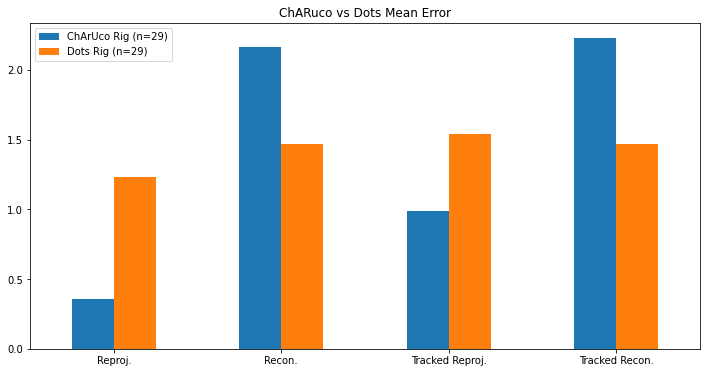

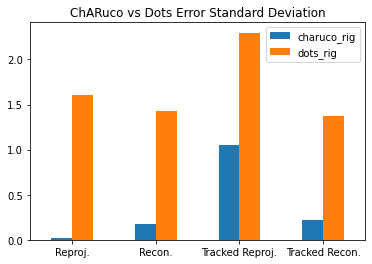

In [5]:
charuco_vs_dots_mean, charuco_vs_dots_std = summarise_datasets(calib_data, ["charuco_rig", "dots_rig"])

columns_to_plot = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

fig1 = plt.figure(figsize=(figsize))
ax1 = fig1.add_subplot(1, 1, 1)

charuco_vs_dots_mean[columns_to_plot].transpose().plot.bar(ax=ax1, title="ChARuco vs Dots Mean Error", rot=0)
charuco_vs_dots_std[columns_to_plot].transpose().plot.bar(title="ChARuco vs Dots Error Standard Deviation", rot=0)

n_charuco_rig = len(calib_data["charuco_rig"])
n_dots_rig = len(calib_data["dots_rig"])

L = ax1.legend()
legend = [f"ChArUco Rig (n={n_charuco_rig})", f"Dots Rig (n={n_dots_rig})"]
L.get_texts()[0].set_text(legend[0])
L.get_texts()[1].set_text(legend[1])

fig1.savefig('plots/charuco_vs_dots_mean.png', dpi=600)

# calib_data["charuco_rig"][columns_to_plot].plot(title="Charuco Rig")
# calib_data["dots_rig"][columns_to_plot].plot(title="Dots Rig")

results = do_ttest(calib_data, "dots_rig", "charuco_rig")

# Iterative vs. Non-iterative Charuco

Reprojection p-value: 5.280707687537331e-09
Reconstruction p-value: 6.179299673855484e-08
Tracked Reprojection p-value: 0.9190153487197547
Tracked Reconstruction p-value: 2.374445882958287e-06


,Reproj.,Recon.,Tracked Reproj.,Tracked Recon.,Mean Frame Grab Time,Mean Calibration Time
charuco_rig,0.357172,2.164376,0.986046,2.226407,1.567297,9.613098
charuco_rig-iterative,0.417697,2.621000,0.957017,2.667913,1.796659,81.485805


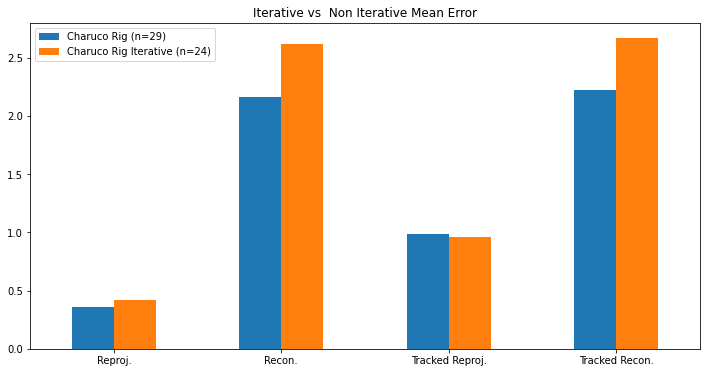

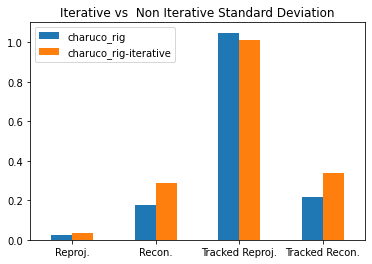

In [6]:
iterative_vs_non_iterative_mean, iterative_vs_non_iterative_std = summarise_datasets(calib_data, ["charuco_rig", "charuco_rig-iterative"])

columns_to_plot = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

fig1 = plt.figure(figsize=(12,6))
ax1 = fig1.add_subplot(1, 1, 1)

iterative_vs_non_iterative_mean[columns_to_plot].transpose().plot.bar(ax=ax1, title="Iterative vs  Non Iterative Mean Error", rot=0)
iterative_vs_non_iterative_std[columns_to_plot].transpose().plot.bar(title="Iterative vs  Non Iterative Standard Deviation", rot=0)

n_rig = len(calib_data["charuco_rig"])
n_iterative = len(calib_data["charuco_rig-iterative"])

L = ax1.legend()
legend = [f"Charuco Rig (n={n_rig})", f"Charuco Rig Iterative (n={n_iterative})"]
L.get_texts()[0].set_text(legend[0])
L.get_texts()[1].set_text(legend[1])

fig1.savefig('plots/charuco_iterative_vs_noniterative_mean.png', dpi=600)

do_ttest(calib_data, "charuco_rig-iterative", "charuco_rig")
iterative_vs_non_iterative_mean

# Iterative  vs non-iterative, dots

Reprojection p-value: 5.280707687537331e-09
Reconstruction p-value: 6.179299673855484e-08
Tracked Reprojection p-value: 0.9190153487197547
Tracked Reconstruction p-value: 2.374445882958287e-06


,Reproj.,Recon.,Tracked Reproj.,Tracked Recon.,Mean Frame Grab Time,Mean Calibration Time
dots_rig,1.233714,1.469214,1.537654,1.468219,2.184797,38.240823
dots_rig-iterative,0.894927,0.965325,1.159774,0.969199,2.258546,78.830426


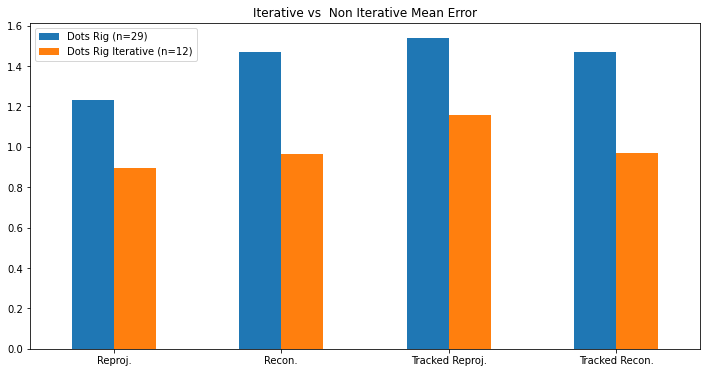

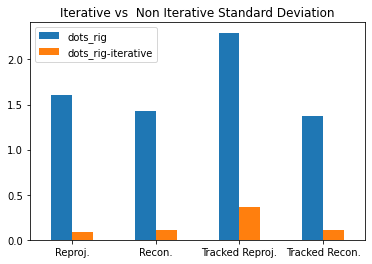

In [7]:
iterative_vs_non_iterative_mean, iterative_vs_non_iterative_std = summarise_datasets(calib_data, ["dots_rig", "dots_rig-iterative"])

columns_to_plot = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

fig1 = plt.figure(figsize=(12,6))
ax1 = fig1.add_subplot(1, 1, 1)

iterative_vs_non_iterative_mean[columns_to_plot].transpose().plot.bar(ax=ax1, title="Iterative vs  Non Iterative Mean Error", rot=0)
iterative_vs_non_iterative_std[columns_to_plot].transpose().plot.bar(title="Iterative vs  Non Iterative Standard Deviation", rot=0)


n_dots_rig = len(calib_data["dots_rig"])
n_dots_iterative = len(calib_data["dots_rig-iterative"])

L = ax1.legend()
legend = [f"Dots Rig (n={n_dots_rig})", f"Dots Rig Iterative (n={n_dots_iterative})"]
L.get_texts()[0].set_text(legend[0])
L.get_texts()[1].set_text(legend[1])

fig1.savefig('plots/dots_iterative_vs_noniterative_mean.png', dpi=600)

do_ttest(calib_data, "charuco_rig-iterative", "charuco_rig")
iterative_vs_non_iterative_mean

# Iterative vs non-iterative freehand

Reprojection p-value: 0.0016530205955698186
Reconstruction p-value: 0.02647049650661743
Tracked Reprojection p-value: 0.41958758021977627
Tracked Reconstruction p-value: 0.23049063258612218


,Reproj.,Recon.,Tracked Reproj.,Tracked Recon.,Mean Frame Grab Time,Mean Calibration Time
charuco_freehand,1.344054,2.232580,4.198533,3.359789,1.223518,20.758543
charuco_freehand-iterative,0.757578,1.531569,3.074206,2.444755,1.201700,105.266480


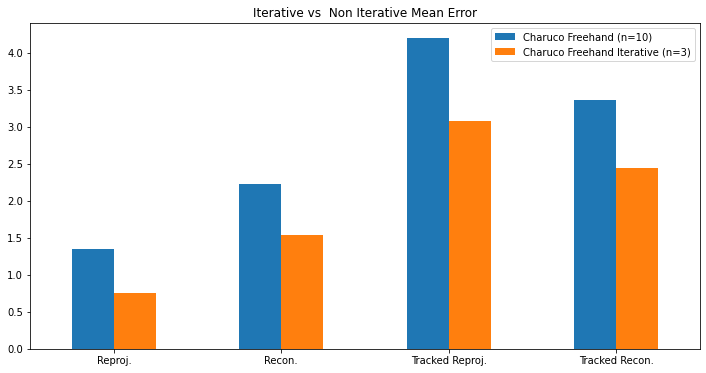

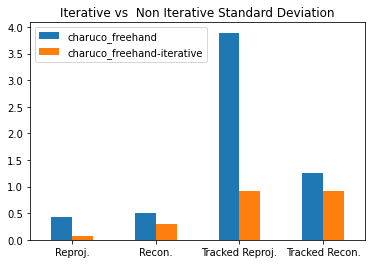

In [8]:
iterative_vs_non_iterative_mean, iterative_vs_non_iterative_std = summarise_datasets(calib_data, ["charuco_freehand", "charuco_freehand-iterative"])

columns_to_plot = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

fig1 = plt.figure(figsize=(12,6))
ax1 = fig1.add_subplot(1, 1, 1)

iterative_vs_non_iterative_mean[columns_to_plot].transpose().plot.bar(ax=ax1, title="Iterative vs  Non Iterative Mean Error", rot=0)
iterative_vs_non_iterative_std[columns_to_plot].transpose().plot.bar(title="Iterative vs  Non Iterative Standard Deviation", rot=0)

n_rig = len(calib_data["charuco_freehand"])
n_iterative = len(calib_data["charuco_freehand-iterative"])

L = ax1.legend()
legend = [f"Charuco Freehand (n={n_rig})", f"Charuco Freehand Iterative (n={n_iterative})"]
L.get_texts()[0].set_text(legend[0])
L.get_texts()[1].set_text(legend[1])

fig1.savefig('plots/charuco_fh_iterative_vs_noniterative_mean.png', dpi=600)

do_ttest(calib_data, "charuco_freehand-iterative", "charuco_freehand")
iterative_vs_non_iterative_mean

# Leave one out/precalibration results
'Standard' approaches to calibration involve calbirating and evaluating on the same datasets, which will return favourable results, when compared to evaluating on a different set of data.

Instead iterate through all datasets and use 1 for calibration, and then evaluate on the rest.

This will results in n sets of results, where n is the total number of calibration data sets collected.

In [9]:
def collate_results(folder: str, threshold: int = 100) -> pd.DataFrame :
    """ Combine results from all csv files in a folder into a single dataframe
    Remove data that is above a certain threshold, which is likely to be due to an error in calbration"""
    print(f"Processing {folder}")
    csv_files = [f for f in os.listdir(folder) if f.endswith('.csv')]
    data = []

    for csv in csv_files:
        file = os.path.join(folder, csv)
        data.append(pd.read_csv(file, index_col=0))
    
    all_data = data[0]
    for i in range(1, len(csv_files)):
        all_data = all_data.append(data[i])
    
    # Clean the data
    good_reproj_idx = all_data["Reproj."] < threshold
    all_data = all_data[good_reproj_idx]

    good_track_reproj_idx = all_data["Tracked Reproj."] < threshold
    all_data = all_data[good_track_reproj_idx]

    good_recon_idx = all_data["Recon."] < threshold
    all_data = all_data[good_recon_idx]

    good_track_recon_idx = all_data["Tracked Recon."] < threshold
    all_data = all_data[good_track_recon_idx]

    return all_data

In [10]:
dots_folder = 'results/precalib/dots_rig'
charuco_folder = 'results/precalib/charuco_rig'
charuco_freehand_folder = 'results/precalib/charuco_freehand'

calib_data = {}
threshold = 1000

calib_data["dots_rig"] = collate_results(dots_folder, threshold=threshold)
calib_data["charuco_rig"] = collate_results(charuco_folder, threshold=threshold)
calib_data["charuco_freehand"] = collate_results(charuco_freehand_folder, threshold=threshold)


Processing results/precalib/dots_rig
Processing results/precalib/charuco_rig
Processing results/precalib/charuco_freehand


# Summary Statistics

Mean Values


,Reproj.,Recon.,Tracked Reproj.,Tracked Recon.,Mean Frame Grab Time,Mean Calibration Time
charuco_rig,0.409193,2.376076,1.066522,2.402564,1.467702,12.125966
dots_rig,1.384997,3.701313,1.544753,3.705598,2.015775,35.988368
charuco_freehand,1.643829,3.345215,4.790706,4.464208,1.570753,23.396600


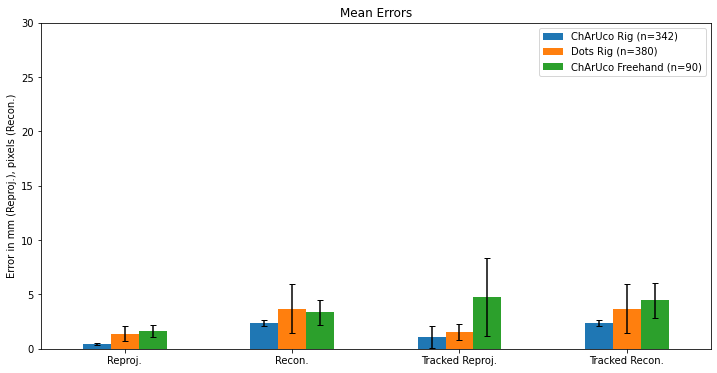

In [11]:
means, stds = summarise_datasets(calib_data, ["charuco_rig", "dots_rig", "charuco_freehand"])
columns_to_plot = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

labels = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

fig1 = plt.figure(figsize=(figsize))
ax1 = fig1.add_subplot(1, 1, 1)

means[columns_to_plot].transpose().plot.bar(title="Mean Errors", ax=ax1, yerr=stds.transpose(), ecolor='black', capsize=3, rot=0, legend=None, ylabel="Error in mm (Reproj.), pixels (Recon.)")
ax1.set_ylim(0, 30)

n_charuco_rig = len(calib_data["charuco_rig"])
n_dots_rig = len(calib_data["dots_rig"])
n_charuco_freehand = len(calib_data["charuco_freehand"])

L = ax1.legend()
legend = [f"ChArUco Rig (n={n_charuco_rig})", f"Dots Rig (n={n_dots_rig})", f"ChArUco Freehand (n={n_charuco_freehand})"]
L.get_texts()[0].set_text(legend[0])
L.get_texts()[1].set_text(legend[1])
L.get_texts()[2].set_text(legend[2])

plt.savefig('plots/charuco_vs_dots_vs_freehand_mean.png', dpi=600)

print("Mean Values")
means

# Freehand vs rig

Reprojection p-value: 6.733125661332567e-35
Reconstruction p-value: 2.800338993466801e-12
Tracked Reprojection p-value: 8.734527620112082e-16
Tracked Reconstruction p-value: 8.526638285673078e-21


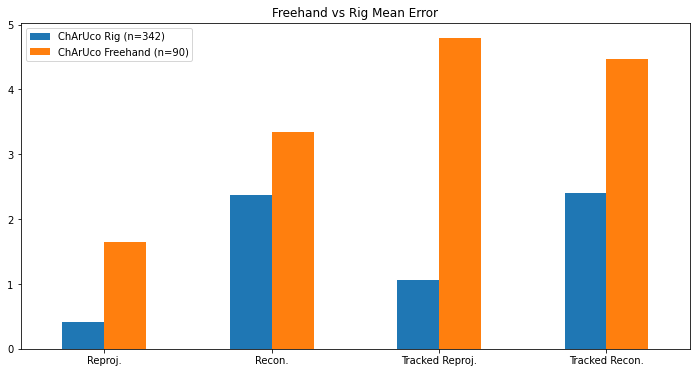

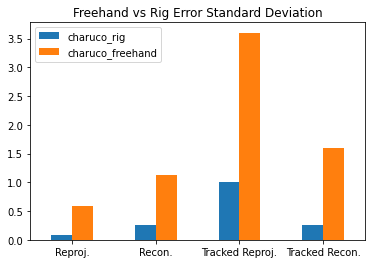

In [12]:
freehand_vs_rig_mean, freehand_vs_rig_std = summarise_datasets(calib_data, ["charuco_rig", "charuco_freehand"])
columns_to_plot = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

fig1 = plt.figure(figsize=(figsize))
ax1 = fig1.add_subplot(1, 1, 1)

freehand_vs_rig_mean[columns_to_plot].transpose().plot.bar(ax=ax1, title="Freehand vs Rig Mean Error", rot=0)
freehand_vs_rig_std[columns_to_plot].transpose().plot.bar(title="Freehand vs Rig Error Standard Deviation", rot=0)

n_charuco_rig = len(calib_data["charuco_rig"])
n_charuco_freehand = len(calib_data["charuco_freehand"])

L = ax1.legend()
legend = [f"ChArUco Rig (n={n_charuco_rig})", f"ChArUco Freehand (n={n_charuco_freehand})"]
L.get_texts()[0].set_text(legend[0])
L.get_texts()[1].set_text(legend[1])

fig1.savefig('plots/charuco_fh_vs_rig_mean.png', dpi=600)

t_test_vals = do_ttest(calib_data, "charuco_rig", "charuco_freehand")

# Charuco vs Dots

Reprojection p-value: 9.116670235464468e-97
Reconstruction p-value: 1.4098505081510012e-26
Tracked Reprojection p-value: 1.7871199610033366e-12
Tracked Reconstruction p-value: 7.407829271664847e-26


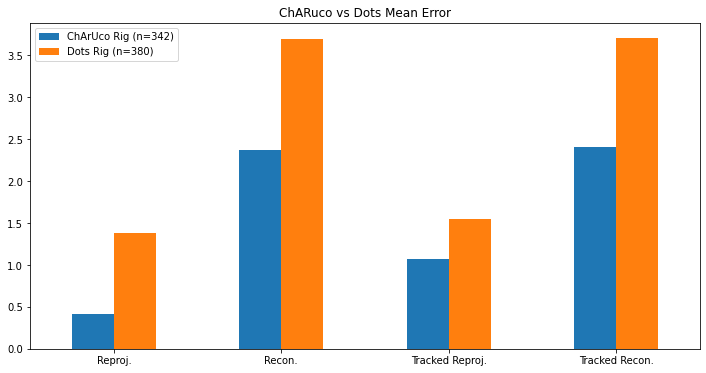

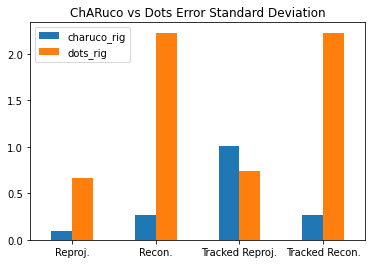

In [13]:
charuco_vs_dots_mean, charuco_vs_dots_std = summarise_datasets(calib_data, ["charuco_rig", "dots_rig"])

columns_to_plot = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

fig1 = plt.figure(figsize=(figsize))
ax1 = fig1.add_subplot(1, 1, 1)

charuco_vs_dots_mean[columns_to_plot].transpose().plot.bar(ax=ax1, title="ChARuco vs Dots Mean Error", rot=0)
charuco_vs_dots_std[columns_to_plot].transpose().plot.bar(title="ChARuco vs Dots Error Standard Deviation", rot=0)

n_charuco_rig = len(calib_data["charuco_rig"])
n_dots_rig = len(calib_data["dots_rig"])

L = ax1.legend()
legend = [f"ChArUco Rig (n={n_charuco_rig})", f"Dots Rig (n={n_dots_rig})"]
L.get_texts()[0].set_text(legend[0])
L.get_texts()[1].set_text(legend[1])

fig1.savefig('plots/charuco_vs_dots_mean.png', dpi=600)

# calib_data["charuco_rig"][columns_to_plot].plot(title="Charuco Rig")
# calib_data["dots_rig"][columns_to_plot].plot(title="Dots Rig")

results = do_ttest(calib_data, "dots_rig", "charuco_rig")